In [46]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [47]:
housing = pd.read_excel('clean_housing.xlsx')
education = pd.read_excel('clean_education.xlsx')

In [48]:
education

,Unnamed: 0,ind_id,ind_definition,estimate,geotype,geotypevalue,geoname,region_name,region_code,county_fips
0,9,355,Percent of population age 25 and up with a fou...,21.100000,CD,607192260,Ontario CCD,Southern California,14,6071
1,10,355,Percent of population age 25 and up with a fou...,0.100000,CD,603593280,Susanville CCD,Northeast Sierra,6,6035
2,11,355,Percent of population age 25 and up with a fou...,17.000000,CD,607192100,Newberry-Baker CCD,Southern California,14,6071
3,12,355,Percent of population age 25 and up with a fou...,19.900000,CD,609792940,Santa Rosa CCD,Bay Area,1,6097
4,13,355,Percent of population age 25 and up with a fou...,28.300000,CD,600190020,Alameda CCD,Bay Area,1,6001
...,...,...,...,...,...,...,...,...,...,...
161356,166545,355,Percent of population age 25 and up with a fou...,28.535354,PL,87090,Zayante CDP,Monterey Bay,4,6087
161357,166546,355,Percent of population age 25 and up with a fou...,44.210526,PL,87090,Zayante CDP,Monterey Bay,4,6087
161358,166547,355,Percent of population age 25 and up with a fou...,27.272727,PL,87090,Zayante CDP,Monterey Bay,4,6087
161359,166548,355,Percent of population age 25 and up with a fou...,0.000000,PL,87090,Zayante CDP,Monterey Bay,4,6087


In [49]:
housing_percent = housing.groupby("county_fips")["percent"].mean()
housing_percent

county_fips
6001    17.670593
6003    13.181527
6005    18.003067
6007    18.358014
6009    18.084347
6011    20.144205
6013    20.219793
6015    15.191752
6017    22.063858
6019    15.677464
6021    15.135558
6023    18.029943
6025    14.949340
6027    17.621806
6029    14.934394
6031    19.243579
6033    24.270381
6035    23.084757
6037    21.146565
6039    22.045864
6041    17.229297
6043    13.148773
6045    24.928900
6047    17.229037
6049    10.074888
6051    13.199011
6053    19.609063
6055    17.103330
6057    24.625456
6059    20.245985
6061    22.092867
6063    15.795355
6065    22.235254
6067    15.674982
6069    19.096125
6071    19.458095
6073    21.620399
6075    19.337630
6077    20.857033
6079    17.020392
6081    18.946596
6083    17.733070
6085    16.573874
6087    20.569473
6089    14.436083
6091     7.141636
6093    23.766762
6095    18.779874
6097    20.123854
6099    15.809767
6101    15.625613
6103    20.037906
6105    10.918471
6107    16.503715
6109    20.47926

In [50]:
education_estimate = education.groupby("county_fips")["estimate"].mean()
education_estimate

county_fips
6001    39.984715
6003    31.956229
6005    20.342844
6007    21.551367
6009    23.150556
6011    13.870473
6013    37.979884
6015    13.659013
6017    29.480521
6019    18.256227
6021    12.279595
6023    25.940552
6025    12.907985
6027    20.238530
6029    14.243714
6031    12.350642
6033    16.276610
6035    13.247732
6037    28.751062
6039    14.558391
6041    54.761008
6043    19.898346
6045    21.586071
6047    12.078822
6049    14.335212
6051    29.491578
6053    24.355912
6055    32.951591
6057    31.954183
6059    36.573754
6061    34.317188
6063    21.319675
6065    19.523723
6067    26.813165
6069    20.495259
6071    18.474985
6073    31.783151
6075    50.739895
6077    15.989274
6079    30.375914
6081    45.193531
6083    31.218755
6085    44.570231
6087    38.251121
6089    20.196972
6091    23.883838
6093    18.018848
6095    23.314011
6097    31.416469
6099    14.431536
6101    16.925835
6103    12.857767
6105    22.841823
6107    11.156396
6109    19.46473

In [51]:
estimation = pd.concat([housing_percent, education_estimate], axis=1).rename(columns={"percent": "housing_percent", "estimate": "education_estimate"})
estimation

,housing_percent,education_estimate
county_fips,,
6001,17.670593,39.984715
6003,13.181527,31.956229
6005,18.003067,20.342844
6007,18.358014,21.551367
6009,18.084347,23.150556
6011,20.144205,13.870473
6013,20.219793,37.979884
6015,15.191752,13.659013
6017,22.063858,29.480521


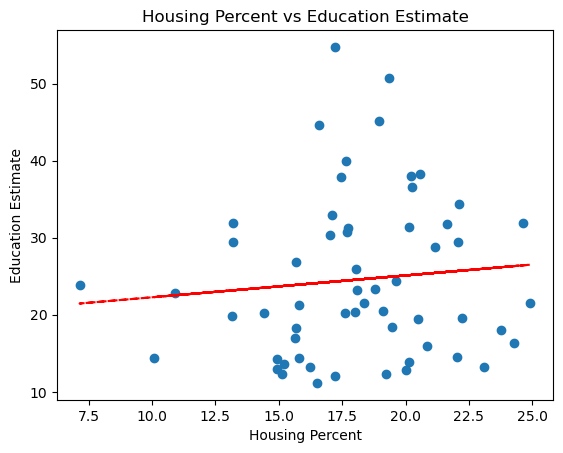

In [52]:
plt.scatter(estimation["housing_percent"], estimation["education_estimate"])
plt.xlabel("Housing Percent")
plt.ylabel("Education Estimate")
plt.title("Housing Percent vs Education Estimate")
z = np.polyfit(estimation["housing_percent"], estimation["education_estimate"], 1)
p = np.poly1d(z)
plt.plot(estimation["housing_percent"],p(estimation["housing_percent"]),"r--")

(array([4., 6., 4., 3., 2., 3., 6., 2., 4., 1., 2., 0., 3., 4., 4., 1., 0.,
        1., 3., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.]),
 array([11.15639612, 12.60988319, 14.06337025, 15.51685731, 16.97034437,
        18.42383143, 19.87731849, 21.33080555, 22.78429262, 24.23777968,
        25.69126674, 27.1447538 , 28.59824086, 30.05172792, 31.50521498,
        32.95870204, 34.41218911, 35.86567617, 37.31916323, 38.77265029,
        40.22613735, 41.67962441, 43.13311147, 44.58659854, 46.0400856 ,
        47.49357266, 48.94705972, 50.40054678, 51.85403384, 53.3075209 ,
        54.76100797]),
 <BarContainer object of 30 artists>)

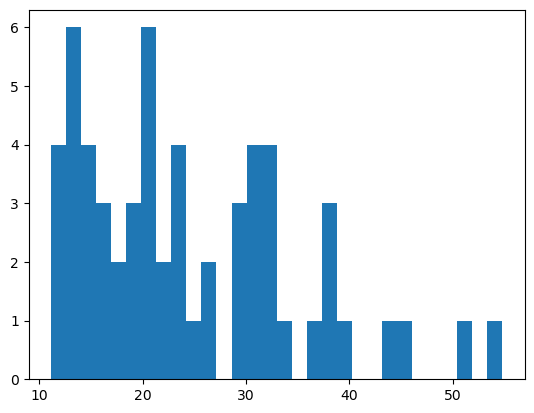

In [53]:
#histogram for education
plt.hist(education_estimate, bins=30)

(array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 3., 0., 1., 4., 5., 3., 2.,
        7., 4., 2., 4., 4., 4., 2., 1., 4., 1., 0., 2., 2.]),
 array([ 7.14163594,  7.73454473,  8.32745352,  8.92036231,  9.5132711 ,
        10.10617989, 10.69908868, 11.29199747, 11.88490626, 12.47781505,
        13.07072384, 13.66363263, 14.25654142, 14.84945021, 15.442359  ,
        16.03526779, 16.62817658, 17.22108537, 17.81399416, 18.40690295,
        18.99981174, 19.59272053, 20.18562932, 20.77853811, 21.3714469 ,
        21.96435569, 22.55726448, 23.15017326, 23.74308205, 24.33599084,
        24.92889963]),
 <BarContainer object of 30 artists>)

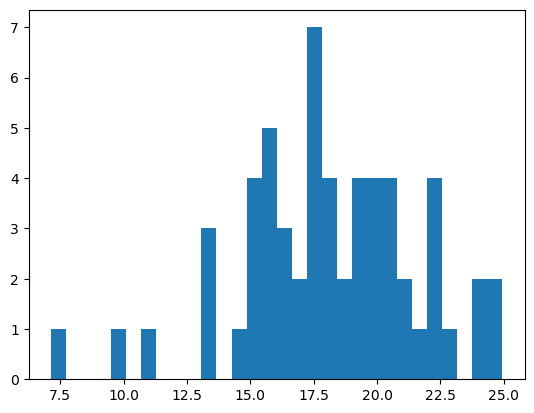

In [54]:
#histogram for housing
plt.hist(housing_percent, bins=30)

In [55]:
import seaborn as sns

<Axes: xlabel='housing_percent', ylabel='county_fips'>

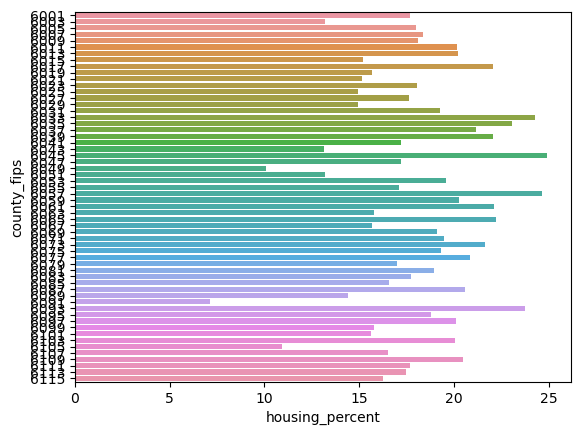

In [72]:
estimation = estimation.reset_index()
estimation["county_fips"] = estimation["county_fips"].astype(str)
sns.barplot(x="housing_percent", y = "county_fips", data = estimation)

<Axes: xlabel='education_estimate', ylabel='county_fips'>

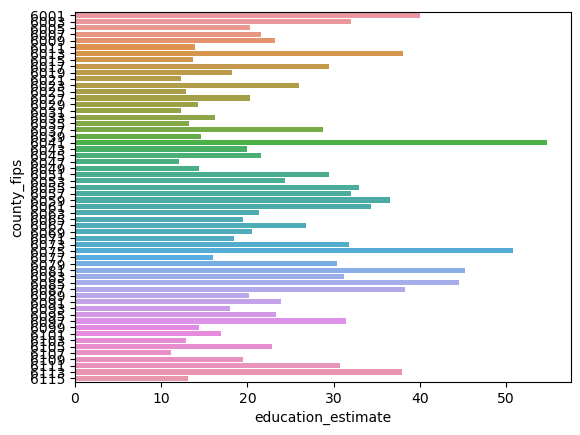

In [73]:
sns.barplot(x="education_estimate", y = "county_fips", data = estimation)